In [1]:
import gc

import paths
import plots
import reports

In [2]:
trees_path = paths.REPORTS_DIR.joinpath(
    "geometry",
)

output_base = trees_path.joinpath("plots")
output_base.mkdir(exist_ok=True)

In [3]:
def read_tree(tree_path):

    data = {
        "name": tree_path.name,
        "tree": reports.TreeReport.parse_file(tree_path.joinpath("tree.json")),
        "clusters": reports.load_tree(tree_path),
    }
    data["clusters_by_depth"] = [
        [c for c in data["clusters"] if c.depth == d]
        for d in range(data["tree"].max_depth + 1)
    ]

    return data

Starting on gist__euclidean ...
reading gist__euclidean ...


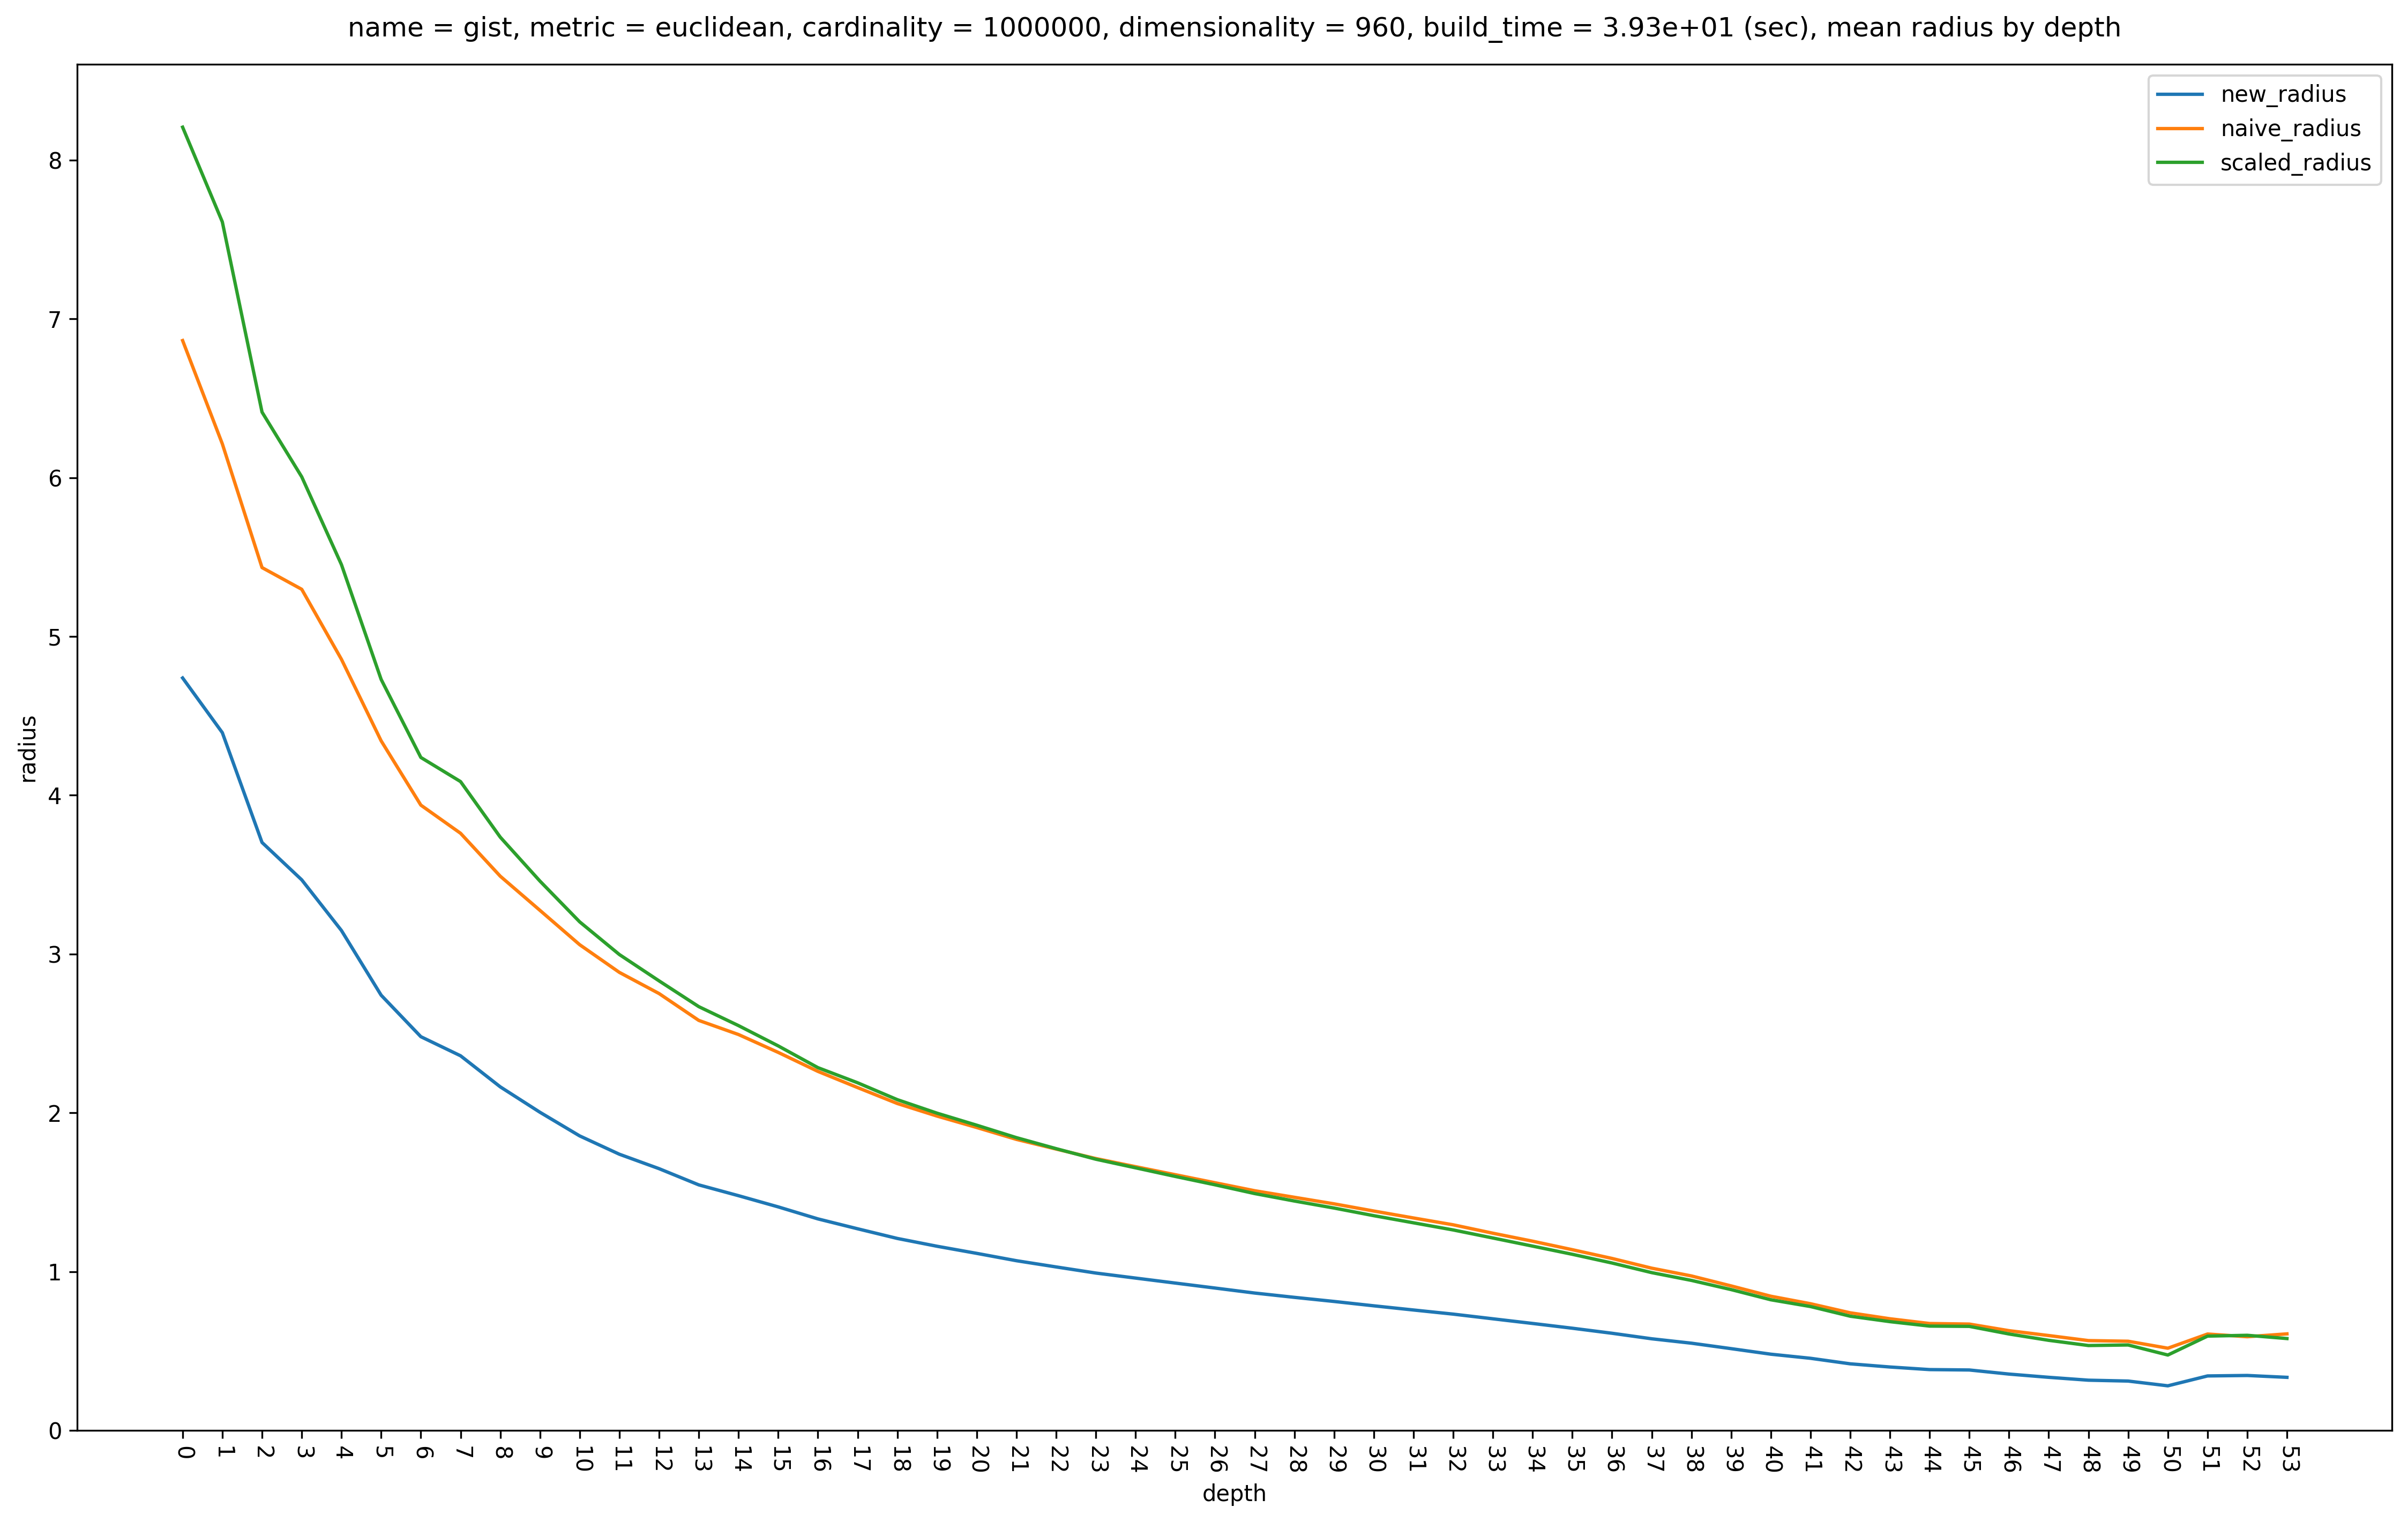

Starting on glove-100__cosine ...
reading glove-100__cosine ...


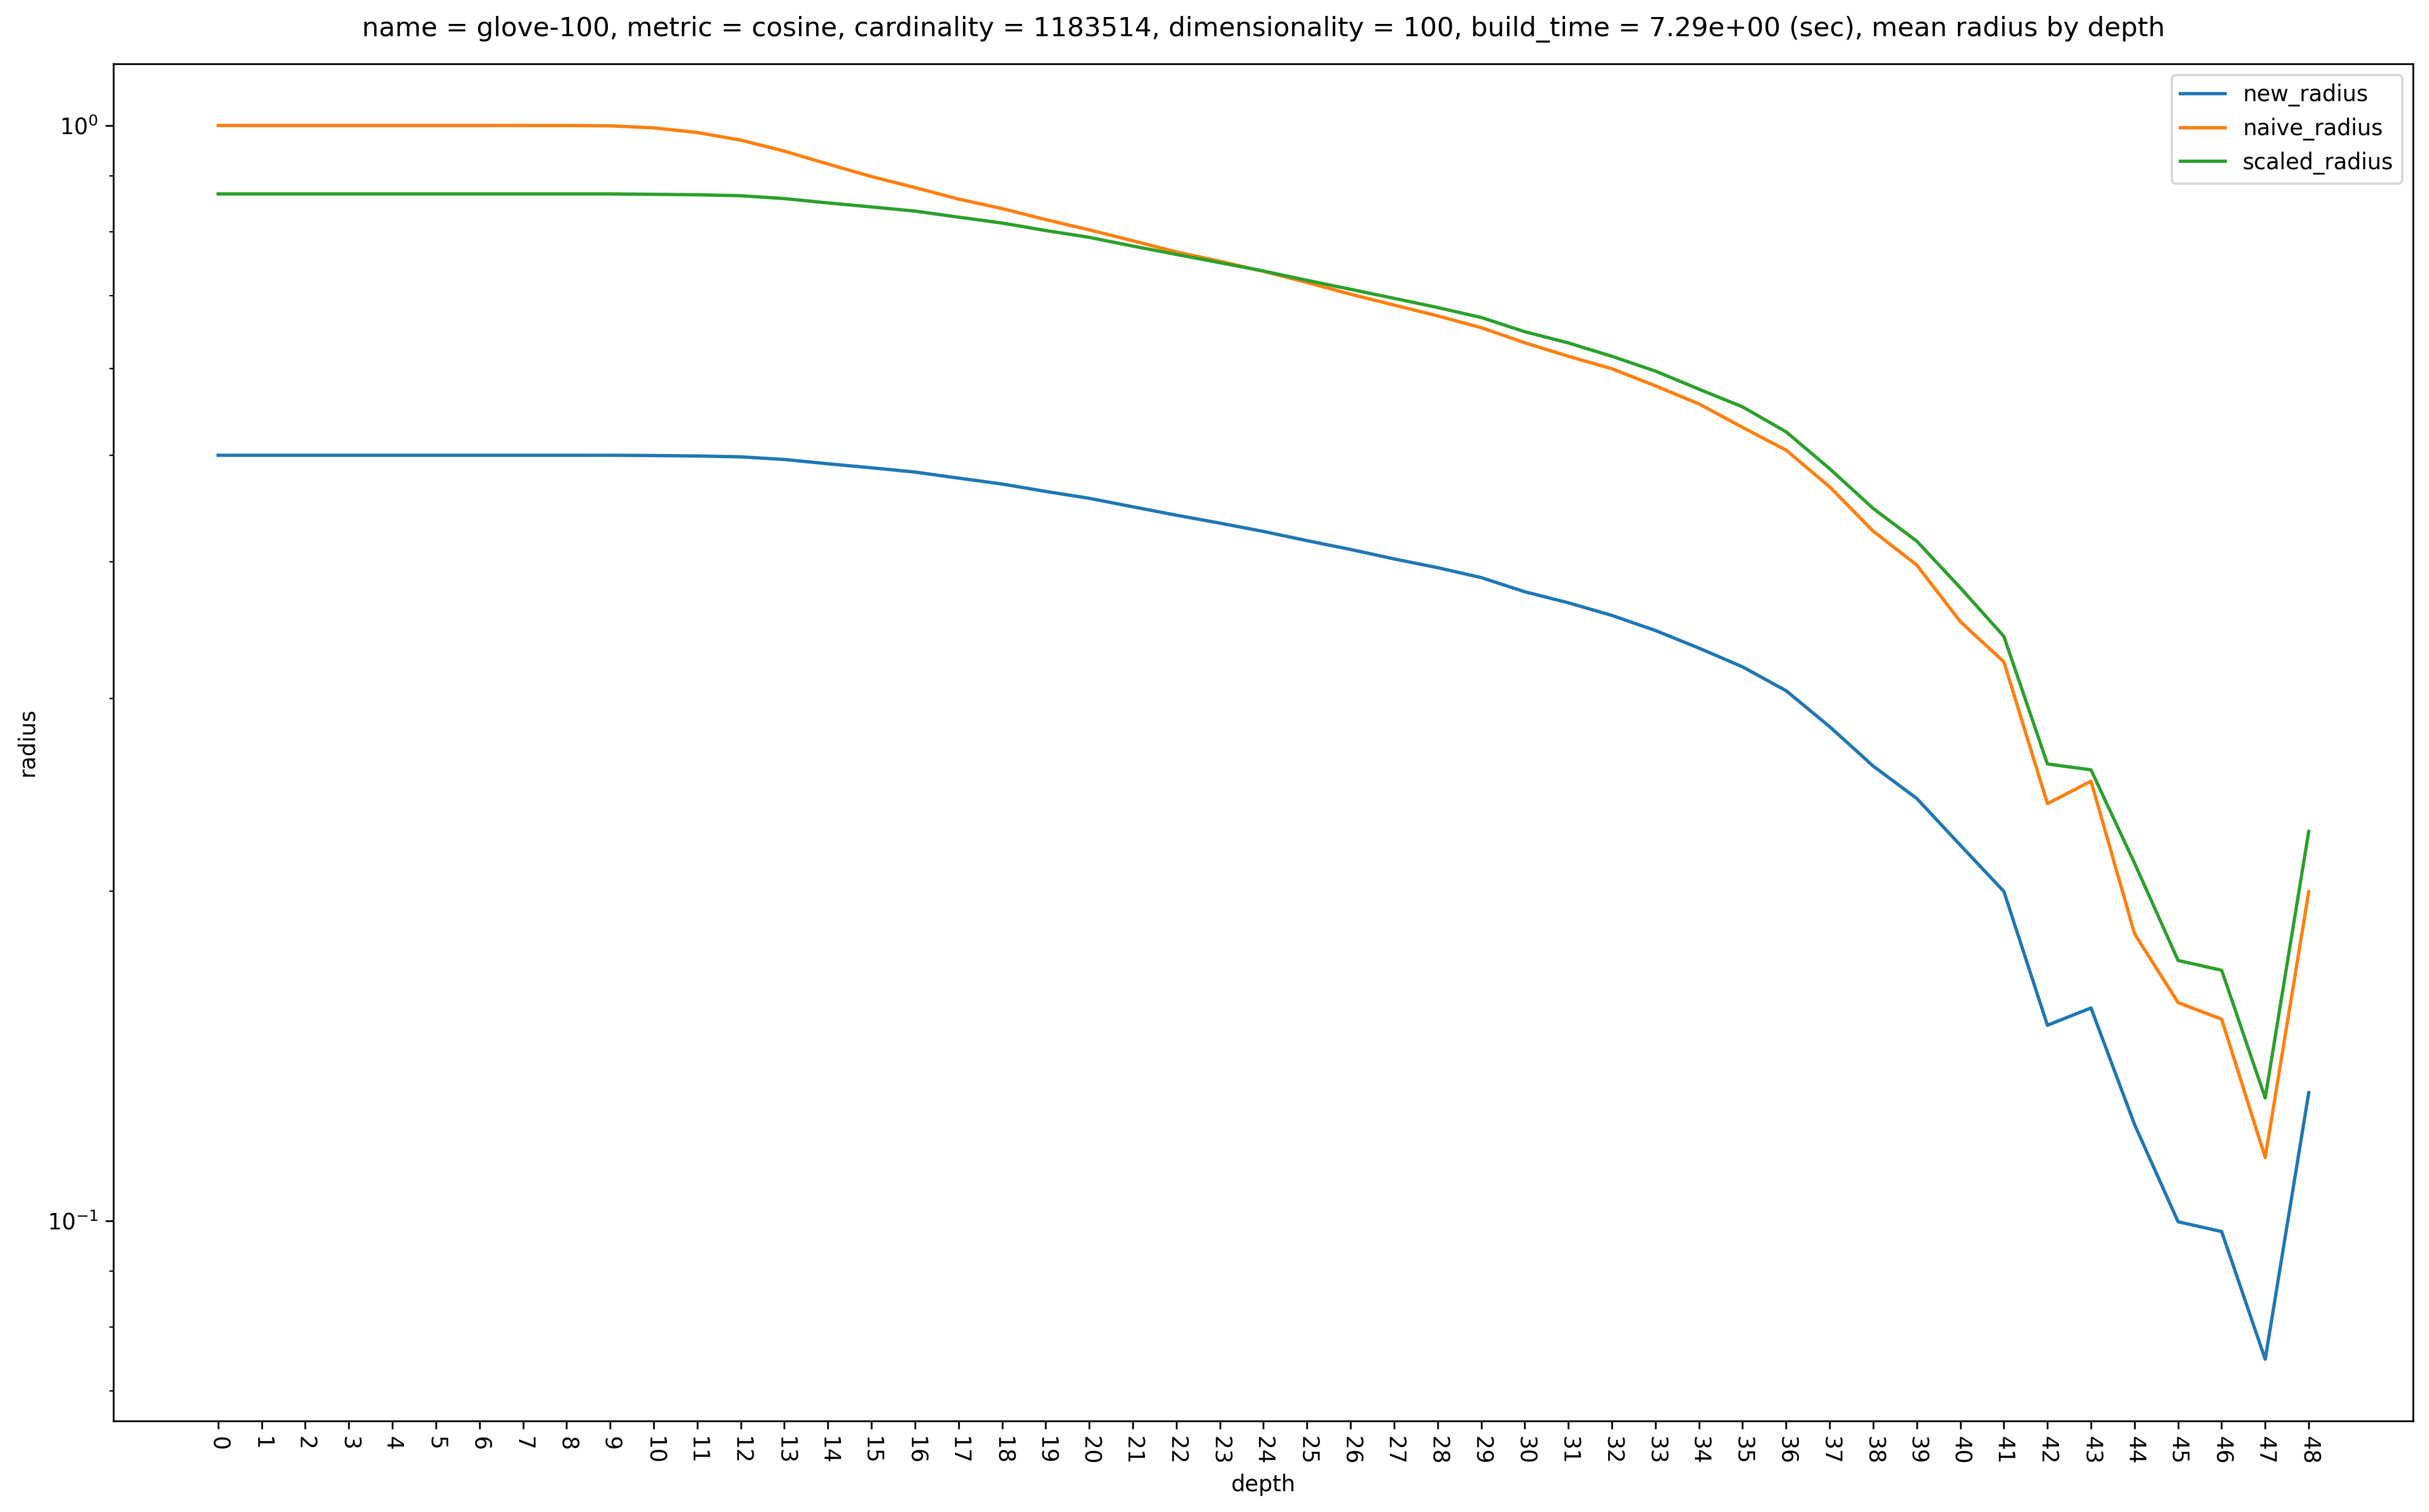

Starting on glove-50__cosine ...
reading glove-50__cosine ...


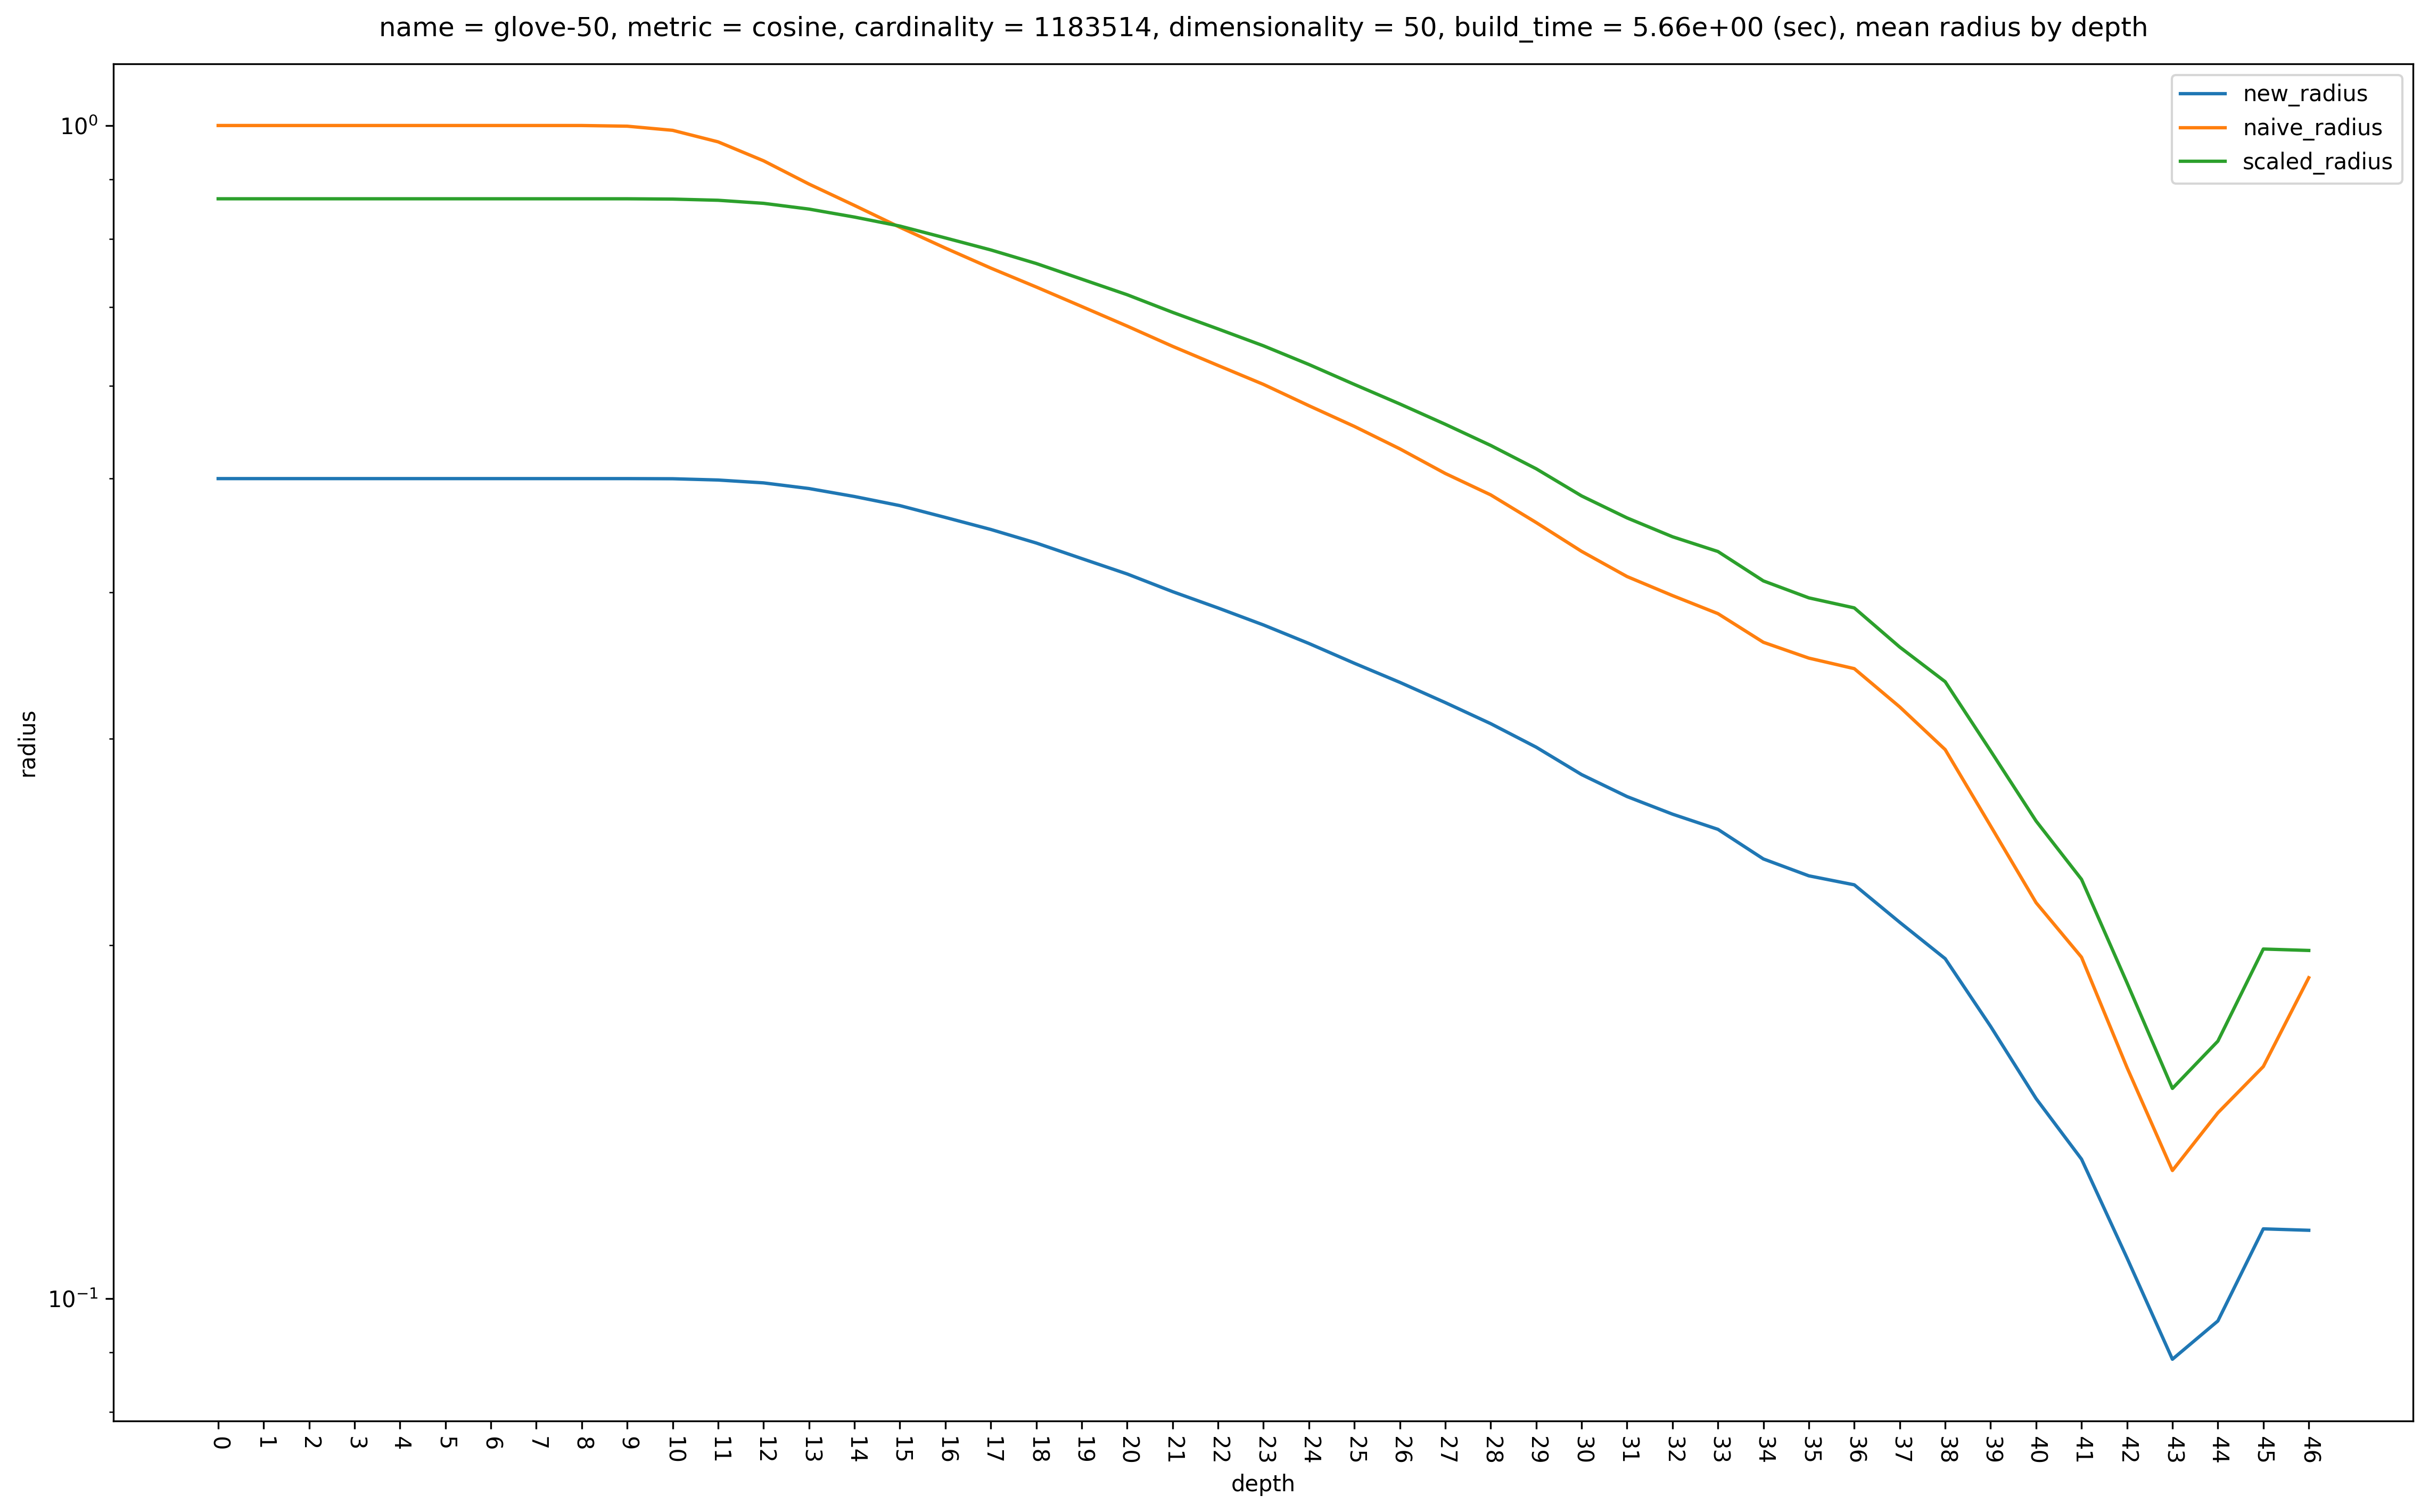

Starting on mnist__euclidean ...
reading mnist__euclidean ...


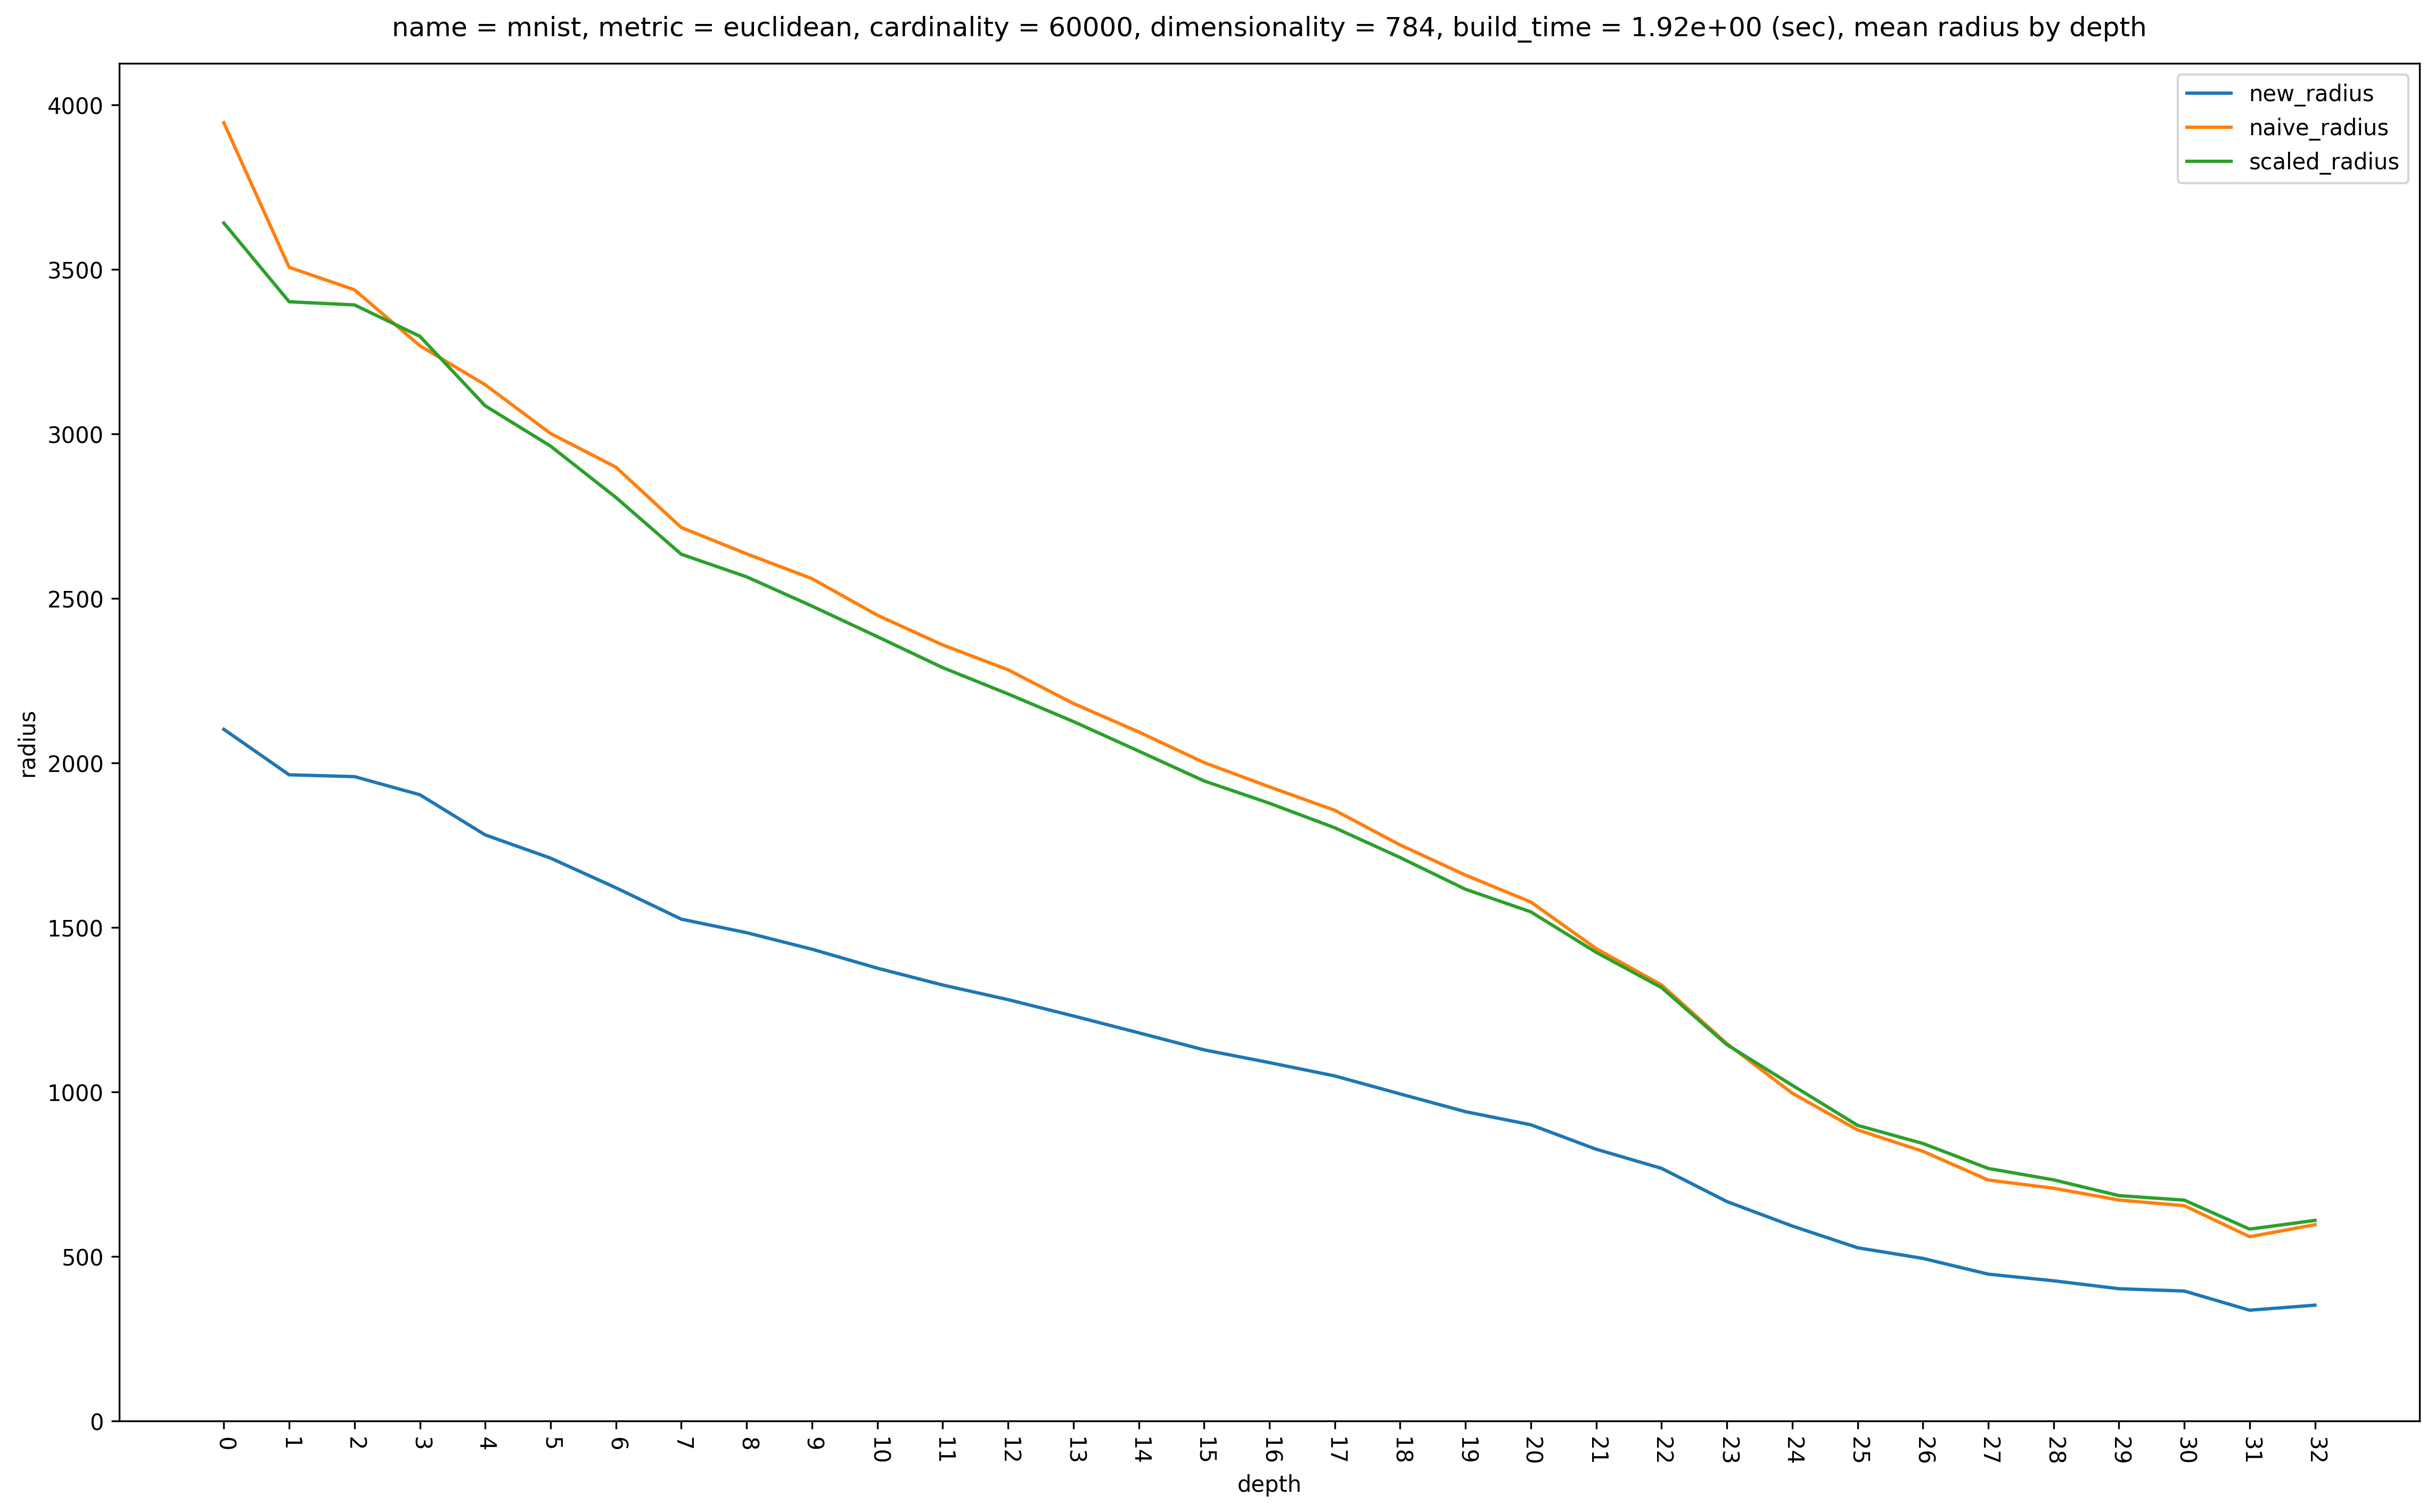

Starting on fashion-mnist__euclidean ...
reading fashion-mnist__euclidean ...


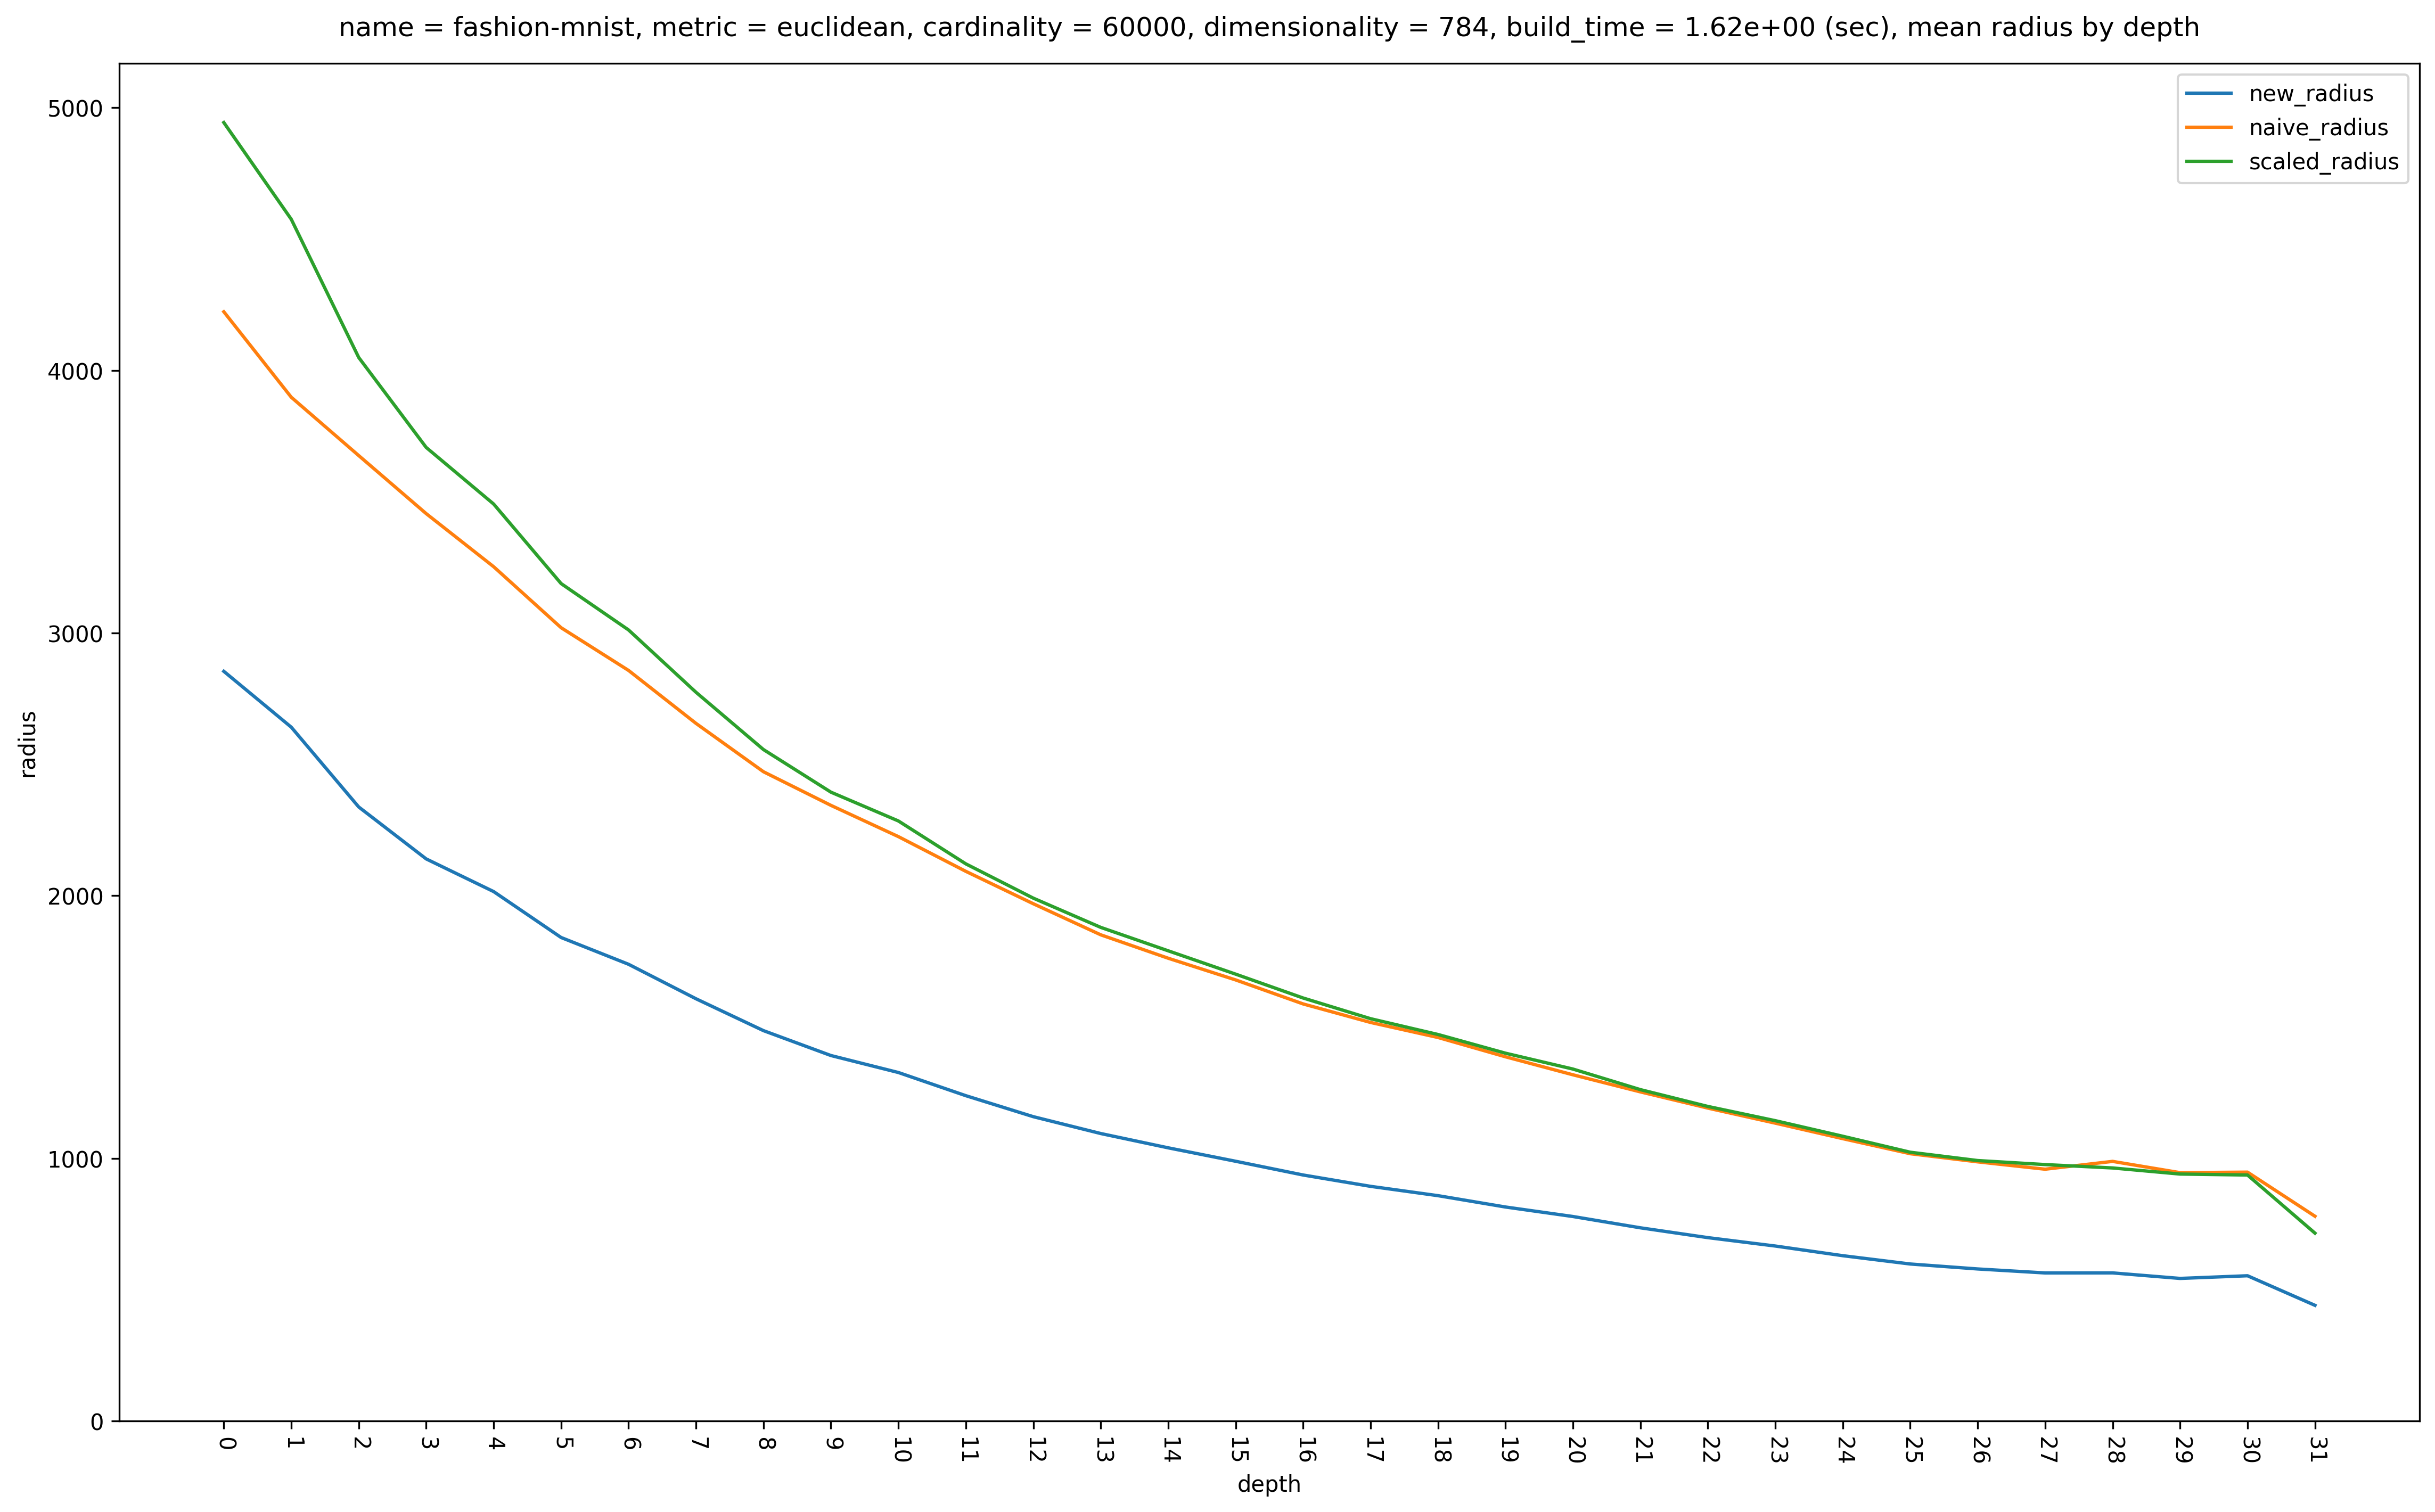

Starting on bug_plots ...
Starting on sift__euclidean ...
reading sift__euclidean ...


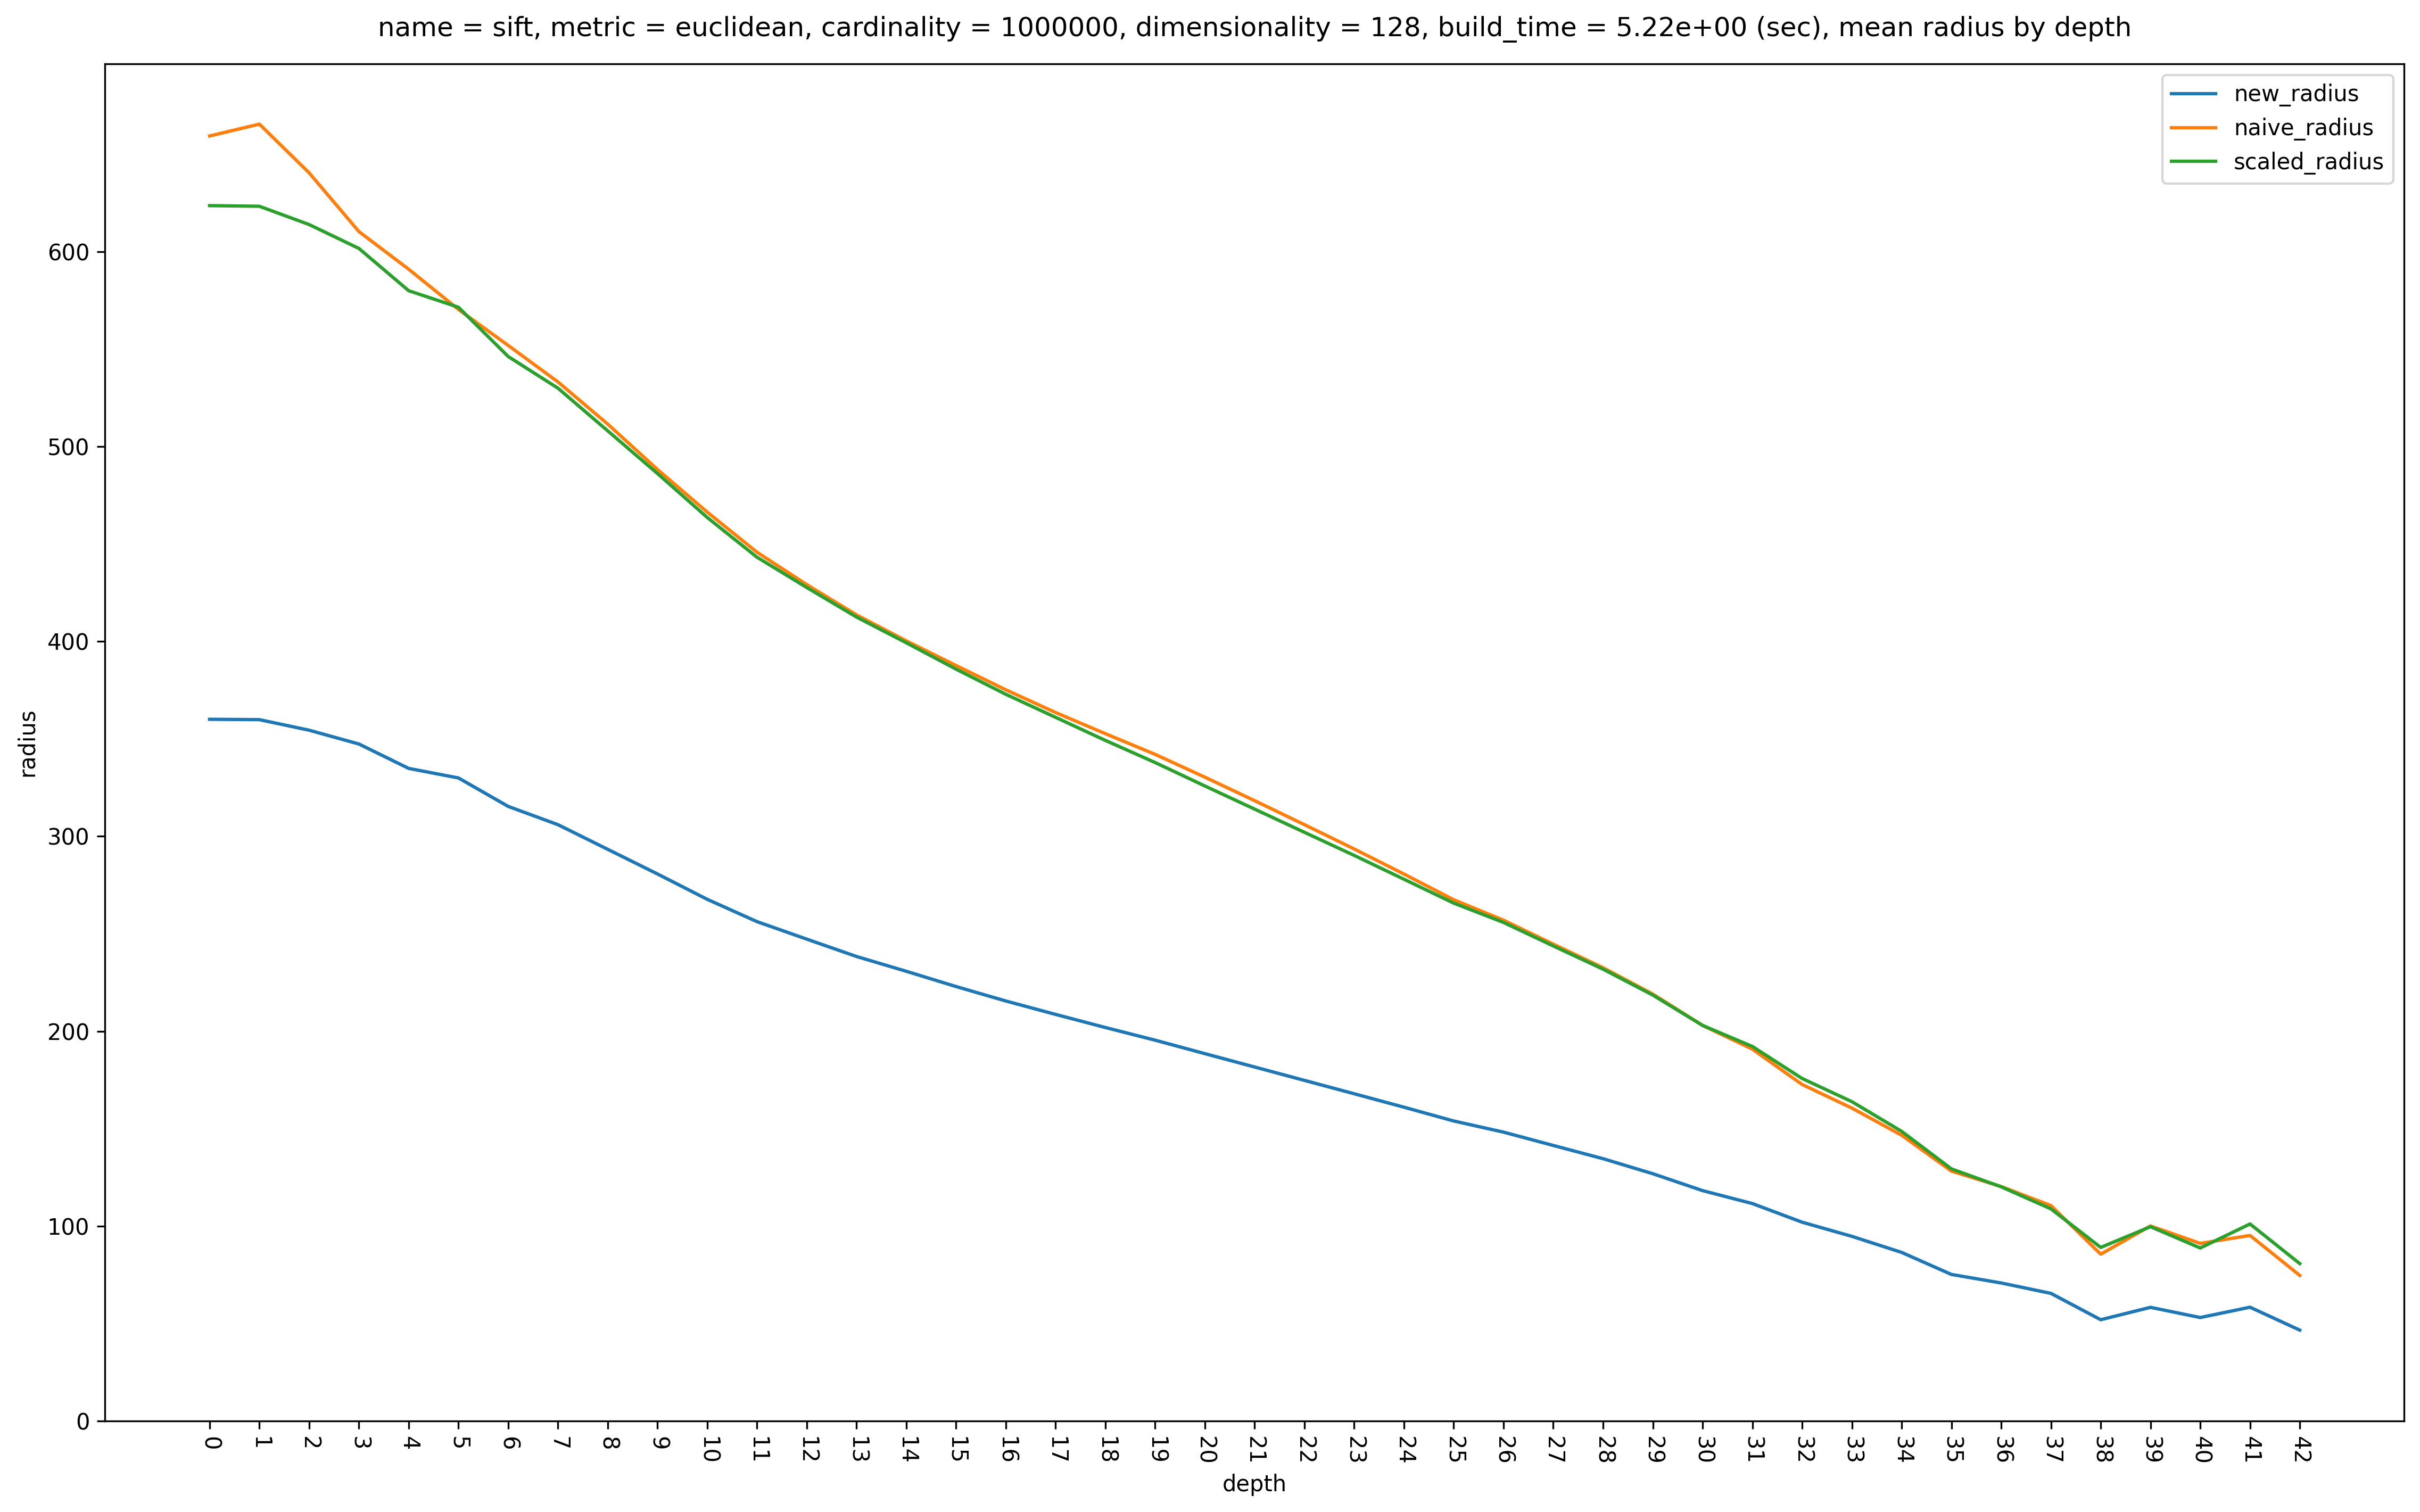

Starting on glove-200__cosine ...
reading glove-200__cosine ...


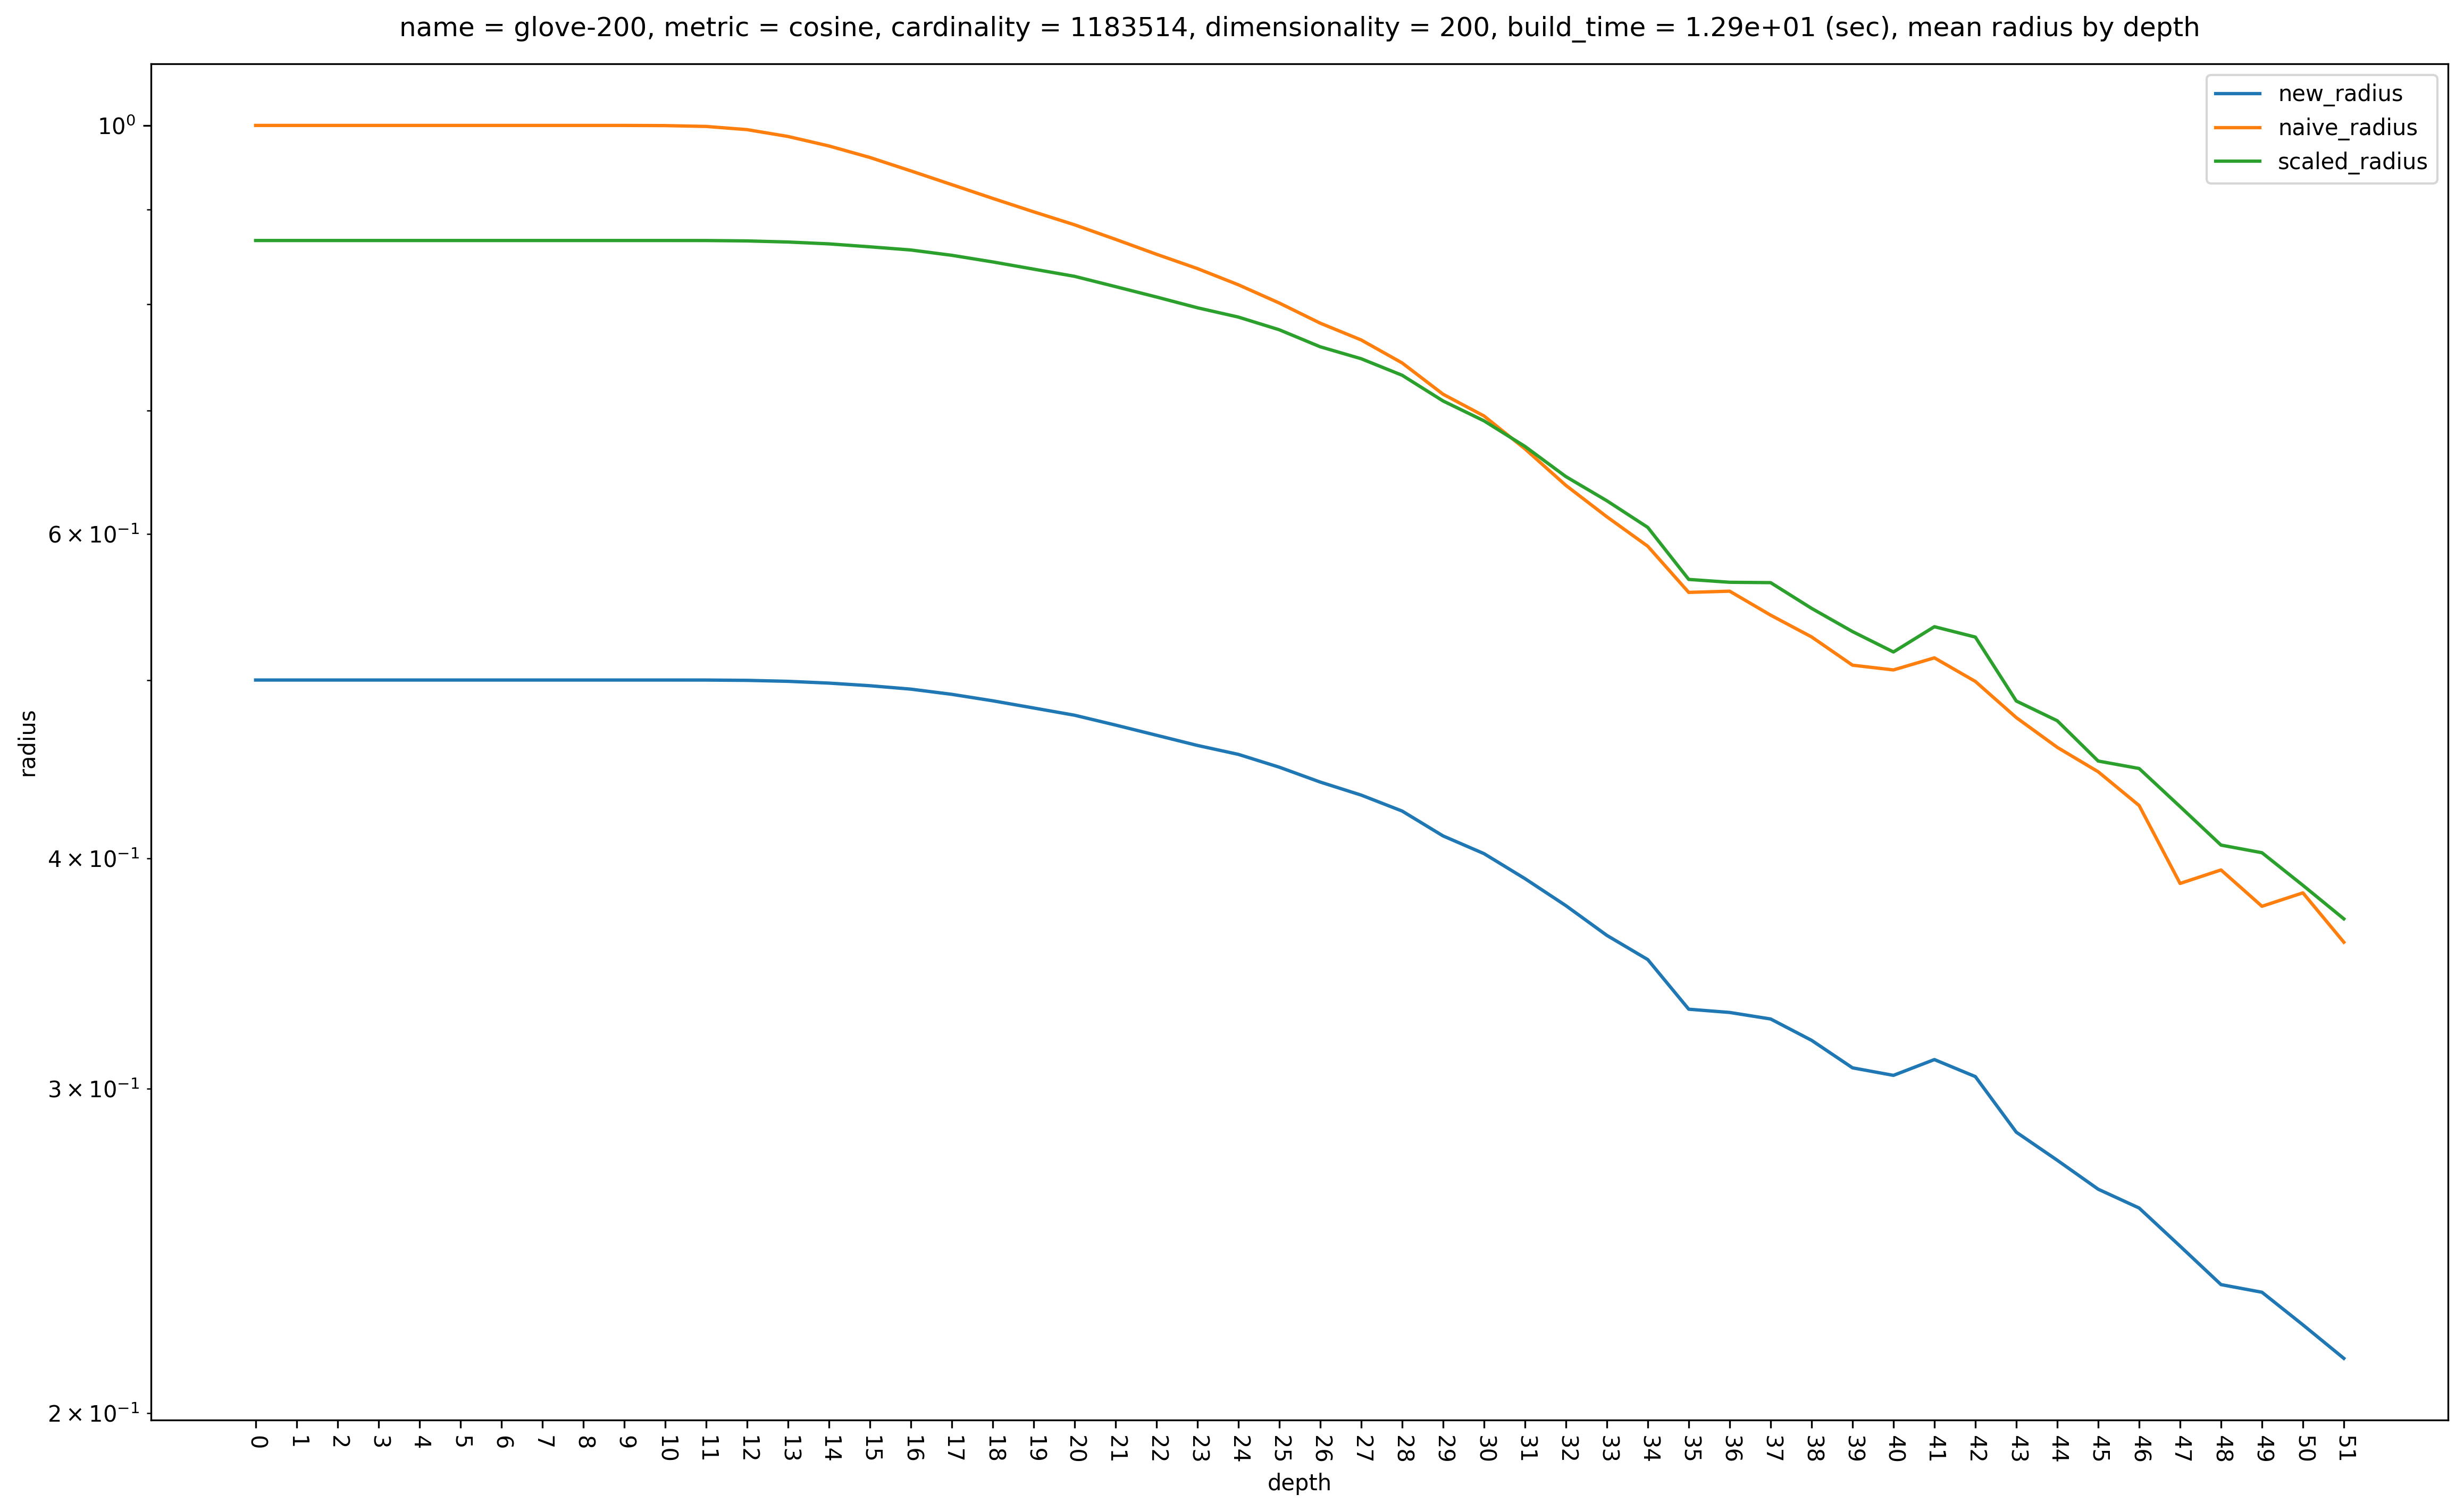

Starting on plots ...
Starting on glove-25__cosine ...
reading glove-25__cosine ...


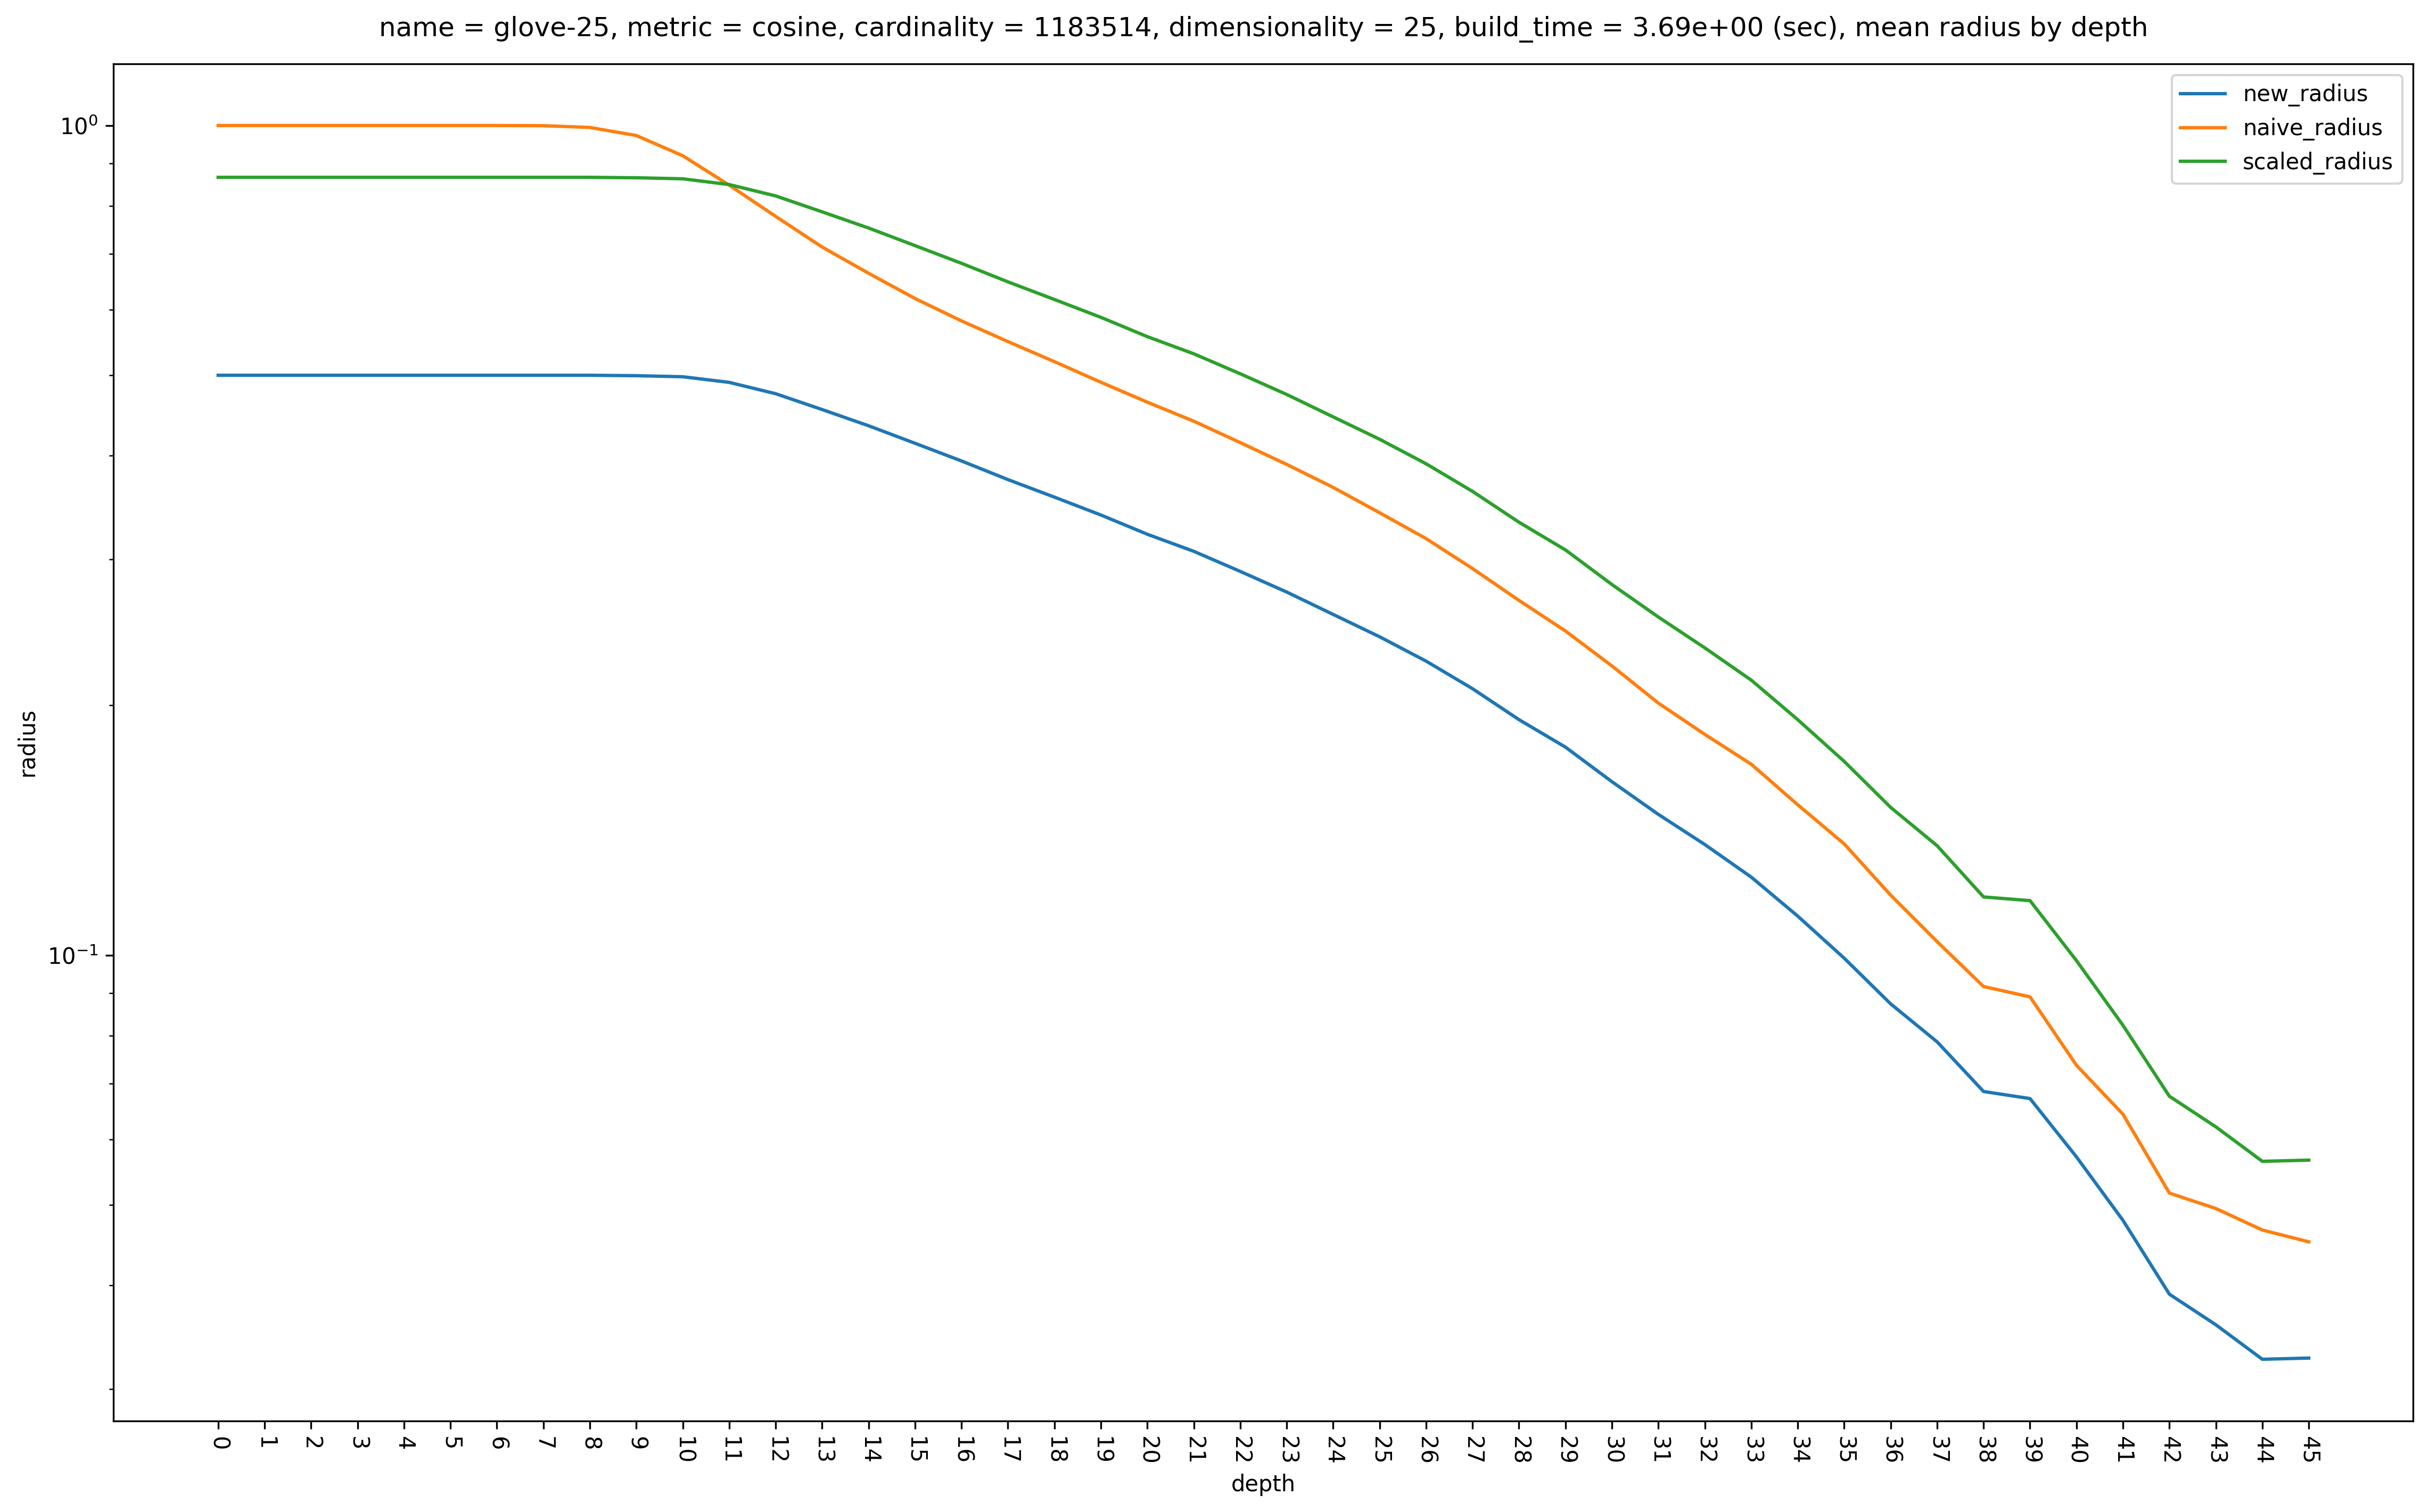

Done!


In [4]:
for path in trees_path.iterdir():
    print(f"Starting on {path.name} ...")
    if any((
        '__' not in path.name,
        # 'euclidean' in path.name,
        'deep-image' in path.name,
        'nytimes' in path.name,
        'lastfm' in path.name,
    )):
        continue

    print(f'reading {path.name} ...')
    dataset = read_tree(path)

    y_scale = "linear" if 'euclidean' in path.name else "log"
    
    # plots.plot_scatter_radii_ratio_vs_cardinality(
    #     dataset["tree"], 
    #     dataset["clusters_by_depth"], 
    #     True,
    #     output_base
    # )
    
    # plots.plot_radius_vs_depth(
    #     "heat",
    #     dataset["tree"],
    #     dataset["clusters_by_depth"],
    #     True,
    #     output_base,
    #     "old_radius"
    # )
    #
    # plots.plot_radius_vs_depth(
    #     "heat",
    #     dataset["tree"],
    #     dataset["clusters_by_depth"],
    #     True,
    #     output_base,
    #     "new_radius"
    # )
    
    plots.plot_mean_radius_vs_depth(
        dataset["tree"], 
        dataset["clusters_by_depth"], 
        y_scale,
        True,
        output_base
    )
        
    # plots.plot_parent_child_ratios_vs_depth(
    #     "violin",
    #     dataset["tree"],
    #     dataset["clusters_by_depth"],
    #     True,
    #     output_base,
    #     "lfd"
    # )

    del dataset
    gc.collect()

print(f'Done!')